# $B2$: Phase Shift Oracle  

## Problem Statement  

You are given integers $ n $, $ L $, and a real number $ \theta $. Implement the oracle $ O $ on a quantum circuit $ qc $ with $ n $ qubits, which acts on computational basis states as follows:  

$$  
|y\rangle_n \xrightarrow{O}  
\begin{cases}  
e^{i\theta} |y\rangle_n & \text{if } y = L, \\  
|y\rangle_n & \text{if } y \neq L.  
\end{cases}  
$$  

for any integer $ y $ such that $ 0 \leq y < 2^n $.  

## Constraints  

$$  
1 \leq n \leq 10  
$$  

$$  
0 \leq L < 2^n  
$$  

$$  
0 \leq \theta < 2\pi  
$$  

- Integers must be encoded in **little-endian** format.  
- **Global phase is ignored** in the evaluation.  

## Sample Input  

$$  
n = 2, \quad L = 1, \quad \theta = \frac{\pi}{2}  
$$  

The implemented circuit $ qc $ should perform the following transformation:  

$$  
\frac{1}{2} \left( |00\rangle + |10\rangle + |01\rangle + |11\rangle \right)  
\quad \xrightarrow{qc} \quad  
\frac{1}{2} \left( |00\rangle + i |10\rangle + |01\rangle + |11\rangle \right).  
$$  

In [ ]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import PhaseGate

def solve(n: int, L: int, theta: float) -> QuantumCircuit:
    qc = QuantumCircuit(n)
    
    #---------------------------
    for k in range(n):      # This part is for state visualization.
        qc.h(k)             # Remove this part while submitting    
    #---------------------------
    
    # Convert L to an n-bit little-endian binary string
    binary_repr = format(L, f'0{n}b')
    little_endian_bin_repr = binary_repr[::-1]  
    
    # Apply X-gates where the corresponding bit in L is 0
    for j in range(n):
        if little_endian_bin_repr[j] == '0':
            qc.x(j)
    
    # Apply the multi-controlled phase shift
    if n==1:
        qc.p(theta= theta)  # If single qubit, apply phase gate directly (corner case)
    else:
        qc.append(PhaseGate(theta=theta).control(n-1), range(n))
    
    # Revert X-gates
    for j in range(n):
        if little_endian_bin_repr[j] == '0':
            qc.x(j)

    return qc


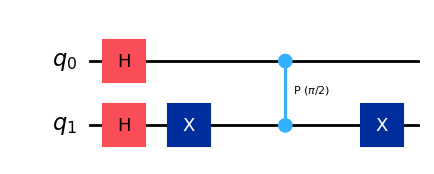

In [28]:
import numpy as np

qc = solve(2, 1, np.pi/2)

qc.draw('mpl')

In [29]:
from qiskit.quantum_info import Statevector

statevector = Statevector(qc)

statevector.draw('latex')

<IPython.core.display.Latex object>

## Solution Approach  

To implement the oracle $ O $, which applies a phase shift $ e^{i\theta} $ only to the computational basis state $ |L\rangle_n $, we follow these steps:  

### Step 1: **Initialize the Quantum Circuit**  
- Create a quantum circuit with $ n $ qubits.  

### Step 2: **State Visualization (For Debugging)**  
- Apply Hadamard ($ H $) gates to all qubits for state visualization.  
- This step should be removed in the final submission.  

### Step 3: **Convert $ L $ to Little-Endian Binary Representation**  
- Convert the integer $ L $ to an $ n $-bit binary string.  
- Reverse the string to match **little-endian** encoding.  

### Step 4: **Mark the Target State Using X-Gates**  
- Iterate over each bit of the little-endian representation of $ L $.  
- Apply an $ X $-gate to qubits where the corresponding bit in $ L $ is $ 0 $.  
- This step prepares the register so that the state $ |L\rangle_n $ corresponds to $ |11\cdots1\rangle $ in the transformed basis.  

### Step 5: **Apply the Multi-Controlled Phase Shift**  
- If $ n = 1 $, apply a single-qubit phase gate $ P(\theta) $.  
- Otherwise, apply an $ (n-1) $-controlled **Phase Gate** $ P(\theta) $, controlled by all $ n-1 $ qubits.  

### Step 6: **Revert the Marking with X-Gates**  
- Undo the effect of Step 4 by reapplying the $ X $-gates to restore the original computational basis states.  

This implementation ensures that only the state $ |L\rangle_n $ accumulates the phase $ e^{i\theta} $, while all other basis states remain unchanged.
